# Principal Component Analysis in Python

In [353]:
%matplotlib inline
import codecs
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy import stats as ss
import csv

from collections import Counter
from collections import defaultdict

import seaborn as sns
from scipy import stats
from dateutil import *
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
import sys


# Generate Test Dataset of Randomly Correlated Variables

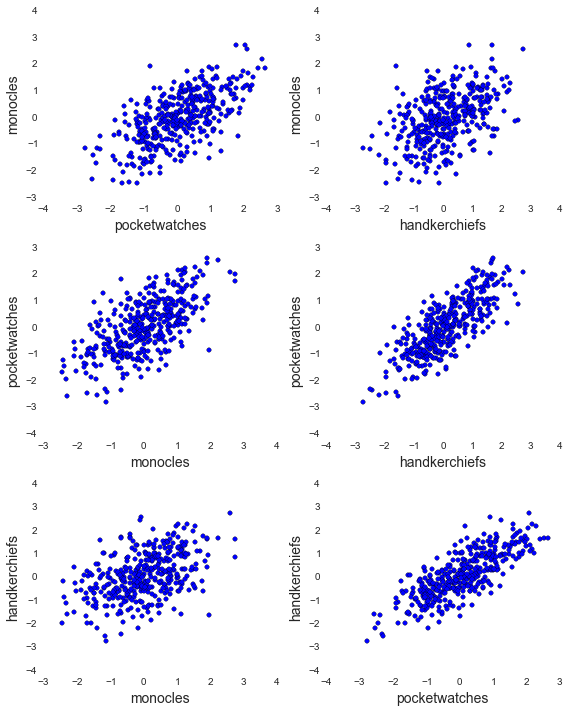

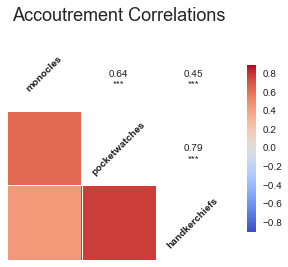

In [354]:
## USING THE CHOLESKY METHOD TO 
## GENERATE CORRELATED RANDOM 
## AND THEN DO A SCATTERPLOT
## http://wiki.scipy.org/Cookbook/CorrelatedRandomSamples
linalg = np.linalg

df = pd.DataFrame()

num_samples = 400

mean = [1,1]
r = np.array([
        [ 1.0,  0.6, 0.4],
        [ 0.6,  1.0, 0.8],
        [ 0.4,  0.8, 1.0]
    ])
x = norm.rvs(size=(3, num_samples))
c = cholesky(r, lower=True)
df['monocles'], df['pocketwatches'], df['handkerchiefs'] = np.dot(c, x)

fig = plt.figure(figsize=(8,10))
cols = ['monocles', 'pocketwatches', 'handkerchiefs']

i = 0
for col in cols:
    for col2 in cols:
        if(col2==col):
            continue
        else:
            i+=1
            ax = fig.add_subplot(3,2,i)
            ax.scatter(df[col2], df[col])
            ax.set_ylabel(col, fontsize="14")
            ax.set_xlabel(col2, fontsize="14")
plt.tight_layout()
plt.show()
sns.corrplot(df)
plt.title("Accoutrement Correlations", fontsize="18")
plt.show()

EIGENVALUES FOR EACH COMPONENT
[ 902.35832841  224.456651     70.18502059]

VARIANCE ACCOUNTED BY EACH COMPONENT
[ 0.7538499  0.187516   0.0586341]

WEIGHTS FOR EACH COMPONENT:

		 COMP1	  COMP2		COMP3
       monocles: -0.5245	  -0.8046  	0.2785
  pocketwatches: -0.6256	  0.1423  	-0.7671
  handkerchiefs: -0.5775	  0.5766  	0.5780


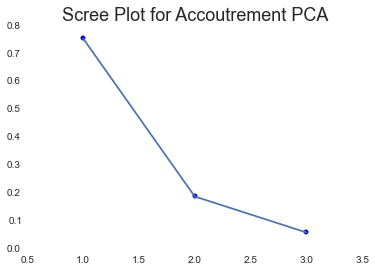

In [355]:
# USING MATPLOTLIB'S PCA
# http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.PCA
import matplotlib.mlab as mp
mp_pca = mp.PCA(df)
print "EIGENVALUES FOR EACH COMPONENT"
print mp_pca.s
print
print "VARIANCE ACCOUNTED BY EACH COMPONENT"
print mp_pca.fracs
print
print "WEIGHTS FOR EACH COMPONENT:"
print
print "\t\t COMP1\t  COMP2\t\tCOMP3" 
for v in range(len(df.columns)):
    print "%(v)15s: %(a).04f\t  %(b).04f  \t%(c).04f" % {"a":mp_pca.Wt[0][v],
                                                   "b":mp_pca.Wt[1][v],
                                                   "c":mp_pca.Wt[2][v],
                                                   "v":df.columns[v]}

plt.plot( [1,2,3], mp_pca.fracs)
plt.scatter([1,2,3], mp_pca.fracs)
plt.title("Scree Plot for Accoutrement PCA", fontsize="18")
plt.show()

If we take the first component only we account for 75% of the variance through. If we add the second, we account for 94% of the variance. If we choose to interpret the table, we might say that the first component represents all **accoutrements**, while the second component might perhaps refer to things that are in one's **pockets**.

In [356]:
df['accoutrements'] = mp_pca.Y[:,0]
df['pockets'] = mp_pca.Y[:,1]

We can verify that these components are completely uncorrelated by scattering them and then showing the correlation. You'll see that there's no correlation between accoutrements and pockets at all, and that as expected, there's a negative correlation between pockets and monocles.

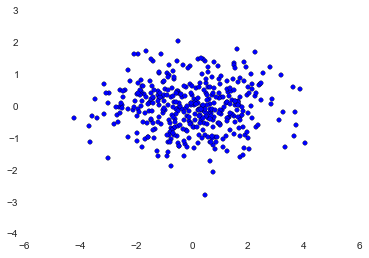

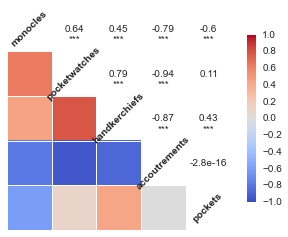

In [357]:
plt.scatter(df.accoutrements, df.pockets)
plt.show()
sns.corrplot(df)

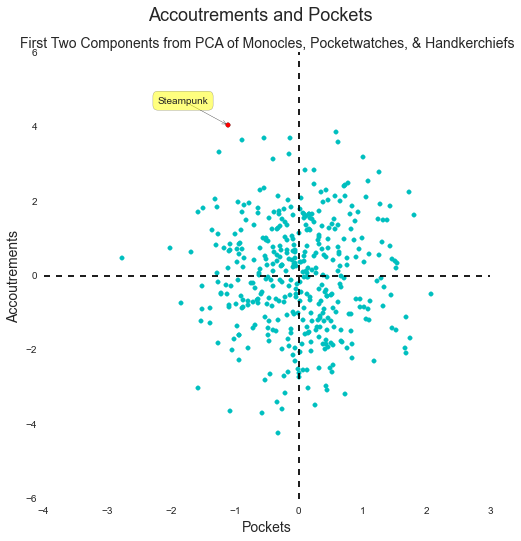

In [358]:
plt.figure(figsize=(8,8))
plt.suptitle("Accoutrements and Pockets", fontsize="18")
plt.title("First Two Components from PCA of Monocles, Pocketwatches, & Handkerchiefs", fontsize="14")
plt.axhline(0, color="black", linestyle="--")
plt.axvline(0, color="black", linestyle="--")
plt.scatter(df.pockets, df.accoutrements, color="c")

#pull out datapoints
max_acc = df[df.accoutrements==df.accoutrements.max()]
plt.scatter(max_acc.pockets, max_acc.accoutrements,
            color="r")

plt.annotate("Steampunk", xy=(max_acc.pockets,max_acc.accoutrements),
             xytext = (-20,20),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.xlabel("Pockets", fontsize="14")
plt.ylabel("Accoutrements", fontsize="14")
plt.show()

# PCA on a Sample Dataset

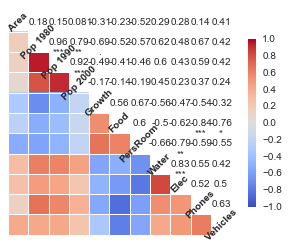

In [403]:
# LOAD CITIES DATASET FROM
# http://geog.uoregon.edu/GeogR/topics/pca.html
df = pd.read_csv("http://geog.uoregon.edu/GeogR/data/csv/cities.csv")
sns.corrplot(df)